In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Furnace Data

In [2]:
furnace_df = pd.read_csv('./material/furnace_train_set/furnace_train_set.csv', sep=';')
furnace_df['time'] = pd.to_datetime(furnace_df['time'], format='%Y-%m-%d %H:%M:%S')

In [3]:
furnace_df.head()

,time,energy,nitrogen_Nm3h
0,2022-09-01 00:00:00+00:00,NaN,NaN
1,2022-09-01 00:00:15+00:00,NaN,NaN
2,2022-09-01 00:00:30+00:00,NaN,NaN
3,2022-09-01 00:00:45+00:00,NaN,NaN
4,2022-09-01 00:01:00+00:00,NaN,NaN


In [21]:
# count rows where energy is -13.37
nan_energy = furnace_df[furnace_df['energy'].isna()]
nan_nitrogen = furnace_df[furnace_df['nitrogen_Nm3h'].isna()]
not_null_energy = furnace_df[furnace_df['energy'] > 0.0]
not_null_nitrogen = furnace_df[furnace_df['nitrogen_Nm3h'] > 0.0]
null_energy = furnace_df[np.isclose(furnace_df['energy'], 0.0)]
null_nitrogen = furnace_df[np.isclose(furnace_df['nitrogen_Nm3h'], 0.0)]
null_or_nan_energy = furnace_df[furnace_df['energy'].isna() | np.isclose(furnace_df['energy'], 0.0)]
null_or_nan_nitrogen = furnace_df[furnace_df['nitrogen_Nm3h'].isna() | np.isclose(furnace_df['nitrogen_Nm3h'], 0.0)]
combined = furnace_df[furnace_df['energy'].isna() | np.isclose(furnace_df['energy'], 0.0) | furnace_df['nitrogen_Nm3h'].isna() | np.isclose(furnace_df['nitrogen_Nm3h'], 0.0)]
combined_and = furnace_df[(furnace_df['energy'].isna() | np.isclose(furnace_df['energy'], 0.0)) & (furnace_df['nitrogen_Nm3h'].isna() | np.isclose(furnace_df['nitrogen_Nm3h'], 0.0))]
combined_not_and = furnace_df[~((furnace_df['energy'].isna() | np.isclose(furnace_df['energy'], 0.0)) & (furnace_df['nitrogen_Nm3h'].isna() | np.isclose(furnace_df['nitrogen_Nm3h'], 0.0)))]

In [22]:
print('Number of normal values in energy',not_null_energy.shape[0])
print('Number of normal values in nitrogen',not_null_nitrogen.shape[0])
print('Number of null values in energy',null_energy.shape[0])
print('Number of null values in nitrogen',null_nitrogen.shape[0])
print('Number of nan values in energy',nan_energy.shape[0])
print('Number of nan values in nitrogen',nan_nitrogen.shape[0])
print('Number of null or nan values in energy',null_or_nan_energy.shape[0])
print('Number of null or nan values in nitrogen',null_or_nan_nitrogen.shape[0])
print('Number of null or nan values in both energy and nitrogen',combined.shape[0])
print('Number of null and nan values in both energy and nitrogen',combined_and.shape[0])
print('Number of no null and nan values in both energy and nitrogen',combined_not_and.shape[0])

Number of normal values in energy 375464
Number of normal values in nitrogen 299671
Number of null values in energy 159813
Number of null values in nitrogen 57
Number of nan values in energy 90235
Number of nan values in nitrogen 325786
Number of null or nan values in energy 250048
Number of null or nan values in nitrogen 325843
Number of null or nan values in both energy and nitrogen 363142
Number of null and nan values in both energy and nitrogen 212749
Number of no null and nan values in both energy and nitrogen 412765


<AxesSubplot:title={'center':'Nitrogen'}, xlabel='time'>

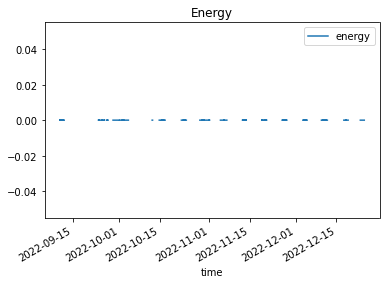

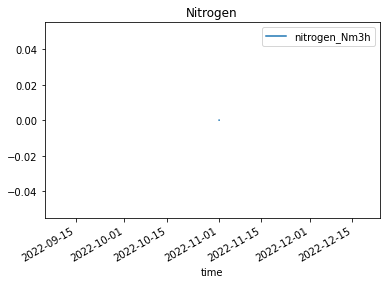

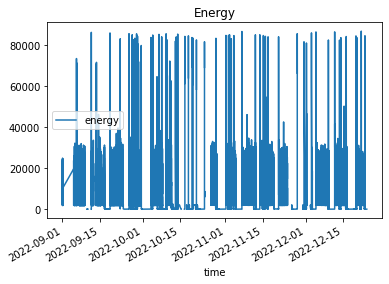

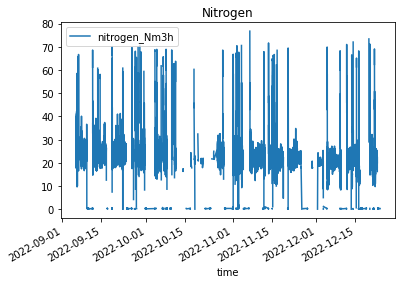

In [23]:
combined_and.plot(x='time', y='energy', title='Energy')
combined_and.plot(x='time', y='nitrogen_Nm3h', title='Nitrogen')
combined_not_and.plot(x='time', y='energy', title='Energy')
combined_not_and.plot(x='time', y='nitrogen_Nm3h', title='Nitrogen')

In [7]:
furnace_df.isna().sum(axis=1).value_counts()

1    283455
0    275776
2     66283
dtype: int64

<AxesSubplot:xlabel='time'>

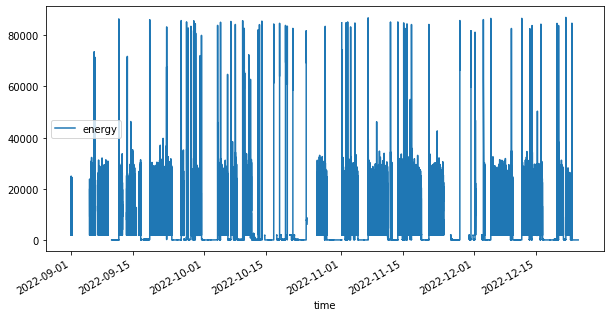

In [8]:
furnace_df.plot(x='time', y='energy', figsize=(10, 5))

<AxesSubplot:xlabel='time'>

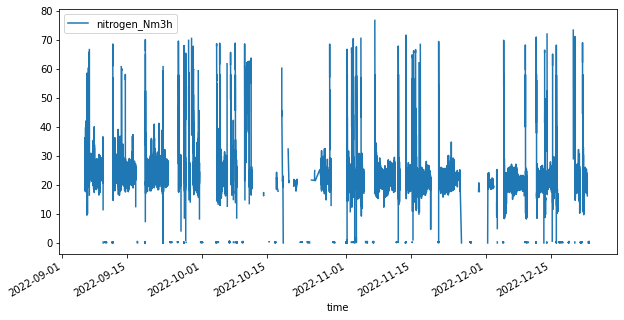

In [9]:
furnace_df.plot(x='time', y='nitrogen_Nm3h', figsize=(10, 5))

# Placer Data

In [10]:
placer_df = pd.read_csv('./material/placer/placer.csv')
#placer_df['STARTTIME'] = pd.to_datetime(placer_df['STARTTIME'], format='%Y-%M-%d %H:%M:%S')
#placer_df['ENDTIME'] = pd.to_datetime(placer_df['ENDTIME'], format='%Y-%M-%d %H:%M:%S')

In [11]:
placer_df.head()

,Unnamed: 0,PCBID,RECIPENAME,SIDE,STARTTIME,ENDTIME,MODULENO,NUMCOMP,NUMBLOCKS,NUMERRORS
0,0,9056093030018024_0048_0001_0001_20220831235024472,1097922-00_NXT3_TL4,0.0,2022-08-31 23:59:44,2022-09-01 00:00:17,8.0,32.0,8.0,0.0
1,1,9056093030018048_0048_0001_0001_20220831235430535,1097922-00_NXT3_TL4,0.0,2022-08-31 23:59:48,2022-09-01 00:00:18,5.0,72.0,8.0,0.0
2,2,9056093030017960_0048_0001_0001_20220831235851351,1097922-00_NXT3_TL4,0.0,2022-08-31 23:59:38,2022-09-01 00:00:20,2.0,168.0,8.0,0.0
3,3,9056093030017968_0048_0001_0001_20220831235947179,1097922-00_NXT3_TL4,0.0,2022-08-31 23:59:40,2022-09-01 00:00:31,1.0,208.0,8.0,0.0
4,4,9056093030017976_0048_0001_0001_20220831235553736,1097922-00_NXT3_TL4,0.0,2022-08-31 23:59:48,2022-09-01 00:00:57,4.0,200.0,8.0,0.0


In [12]:
# detect datetime format
placer_df['ENDTIME'].apply(lambda x: len(x)).value_counts()

19    571644
15     75766
14     50494
16     33513
Name: ENDTIME, dtype: int64

In [13]:
#detect datetime format
placer_df['ENDTIME'].apply(lambda x: len(x)).value_counts()

19    571644
15     75766
14     50494
16     33513
Name: ENDTIME, dtype: int64

In [14]:
for i in [14,15,16,19]:
    print(placer_df[placer_df['STARTTIME'].apply(lambda x: len(x)) == i]['STARTTIME'].head(1))

575456    12/2/2022 0:00
Name: STARTTIME, dtype: object
571644    12/1/2022 16:41
Name: STARTTIME, dtype: object
676202    12/11/2022 22:43
Name: STARTTIME, dtype: object
0    2022-08-31 23:59:44
Name: STARTTIME, dtype: object


In [15]:
placer_df.loc[placer_df['STARTTIME'].apply(lambda x: len(x)) == 14,'STARTTIME'] = pd.to_datetime(placer_df[placer_df['STARTTIME'].apply(lambda x: len(x)) == 14]['STARTTIME'], format='%m/%d/%Y %H:%M')
placer_df.loc[placer_df['ENDTIME'].apply(lambda x: len(x)) == 14,'ENDTIME'] = pd.to_datetime(placer_df[placer_df['ENDTIME'].apply(lambda x: len(x)) == 14]['ENDTIME'], format='%m/%d/%Y %H:%M')

In [17]:
a = placer_df.NUMERRORS.value_counts()

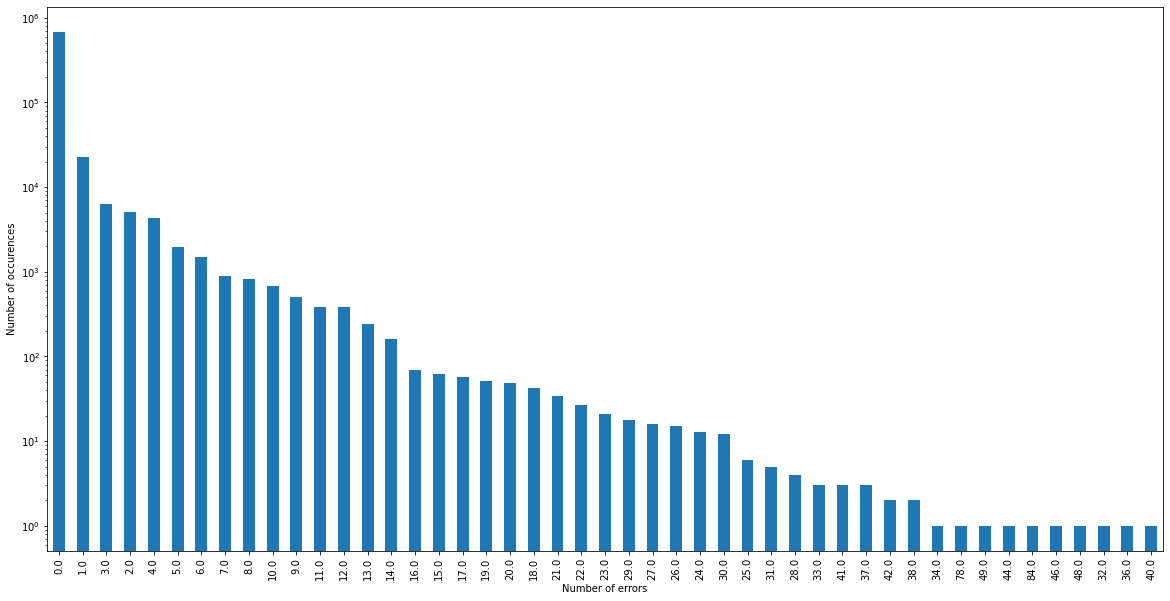

In [19]:
a.plot(kind='bar', figsize=(20,10))
plt.xlabel('Number of errors')
plt.ylabel('Number of occurences')
plt.yscale('log')